<a href="https://colab.research.google.com/github/AmlAboElanin/LA-Crime-Data-Analysis-by-bython/blob/main/LA__CRIMES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LA_Crimes
#Datalink:https://www.kaggle.com/datasets/shayalvaghasiya/los-angeles-crimes


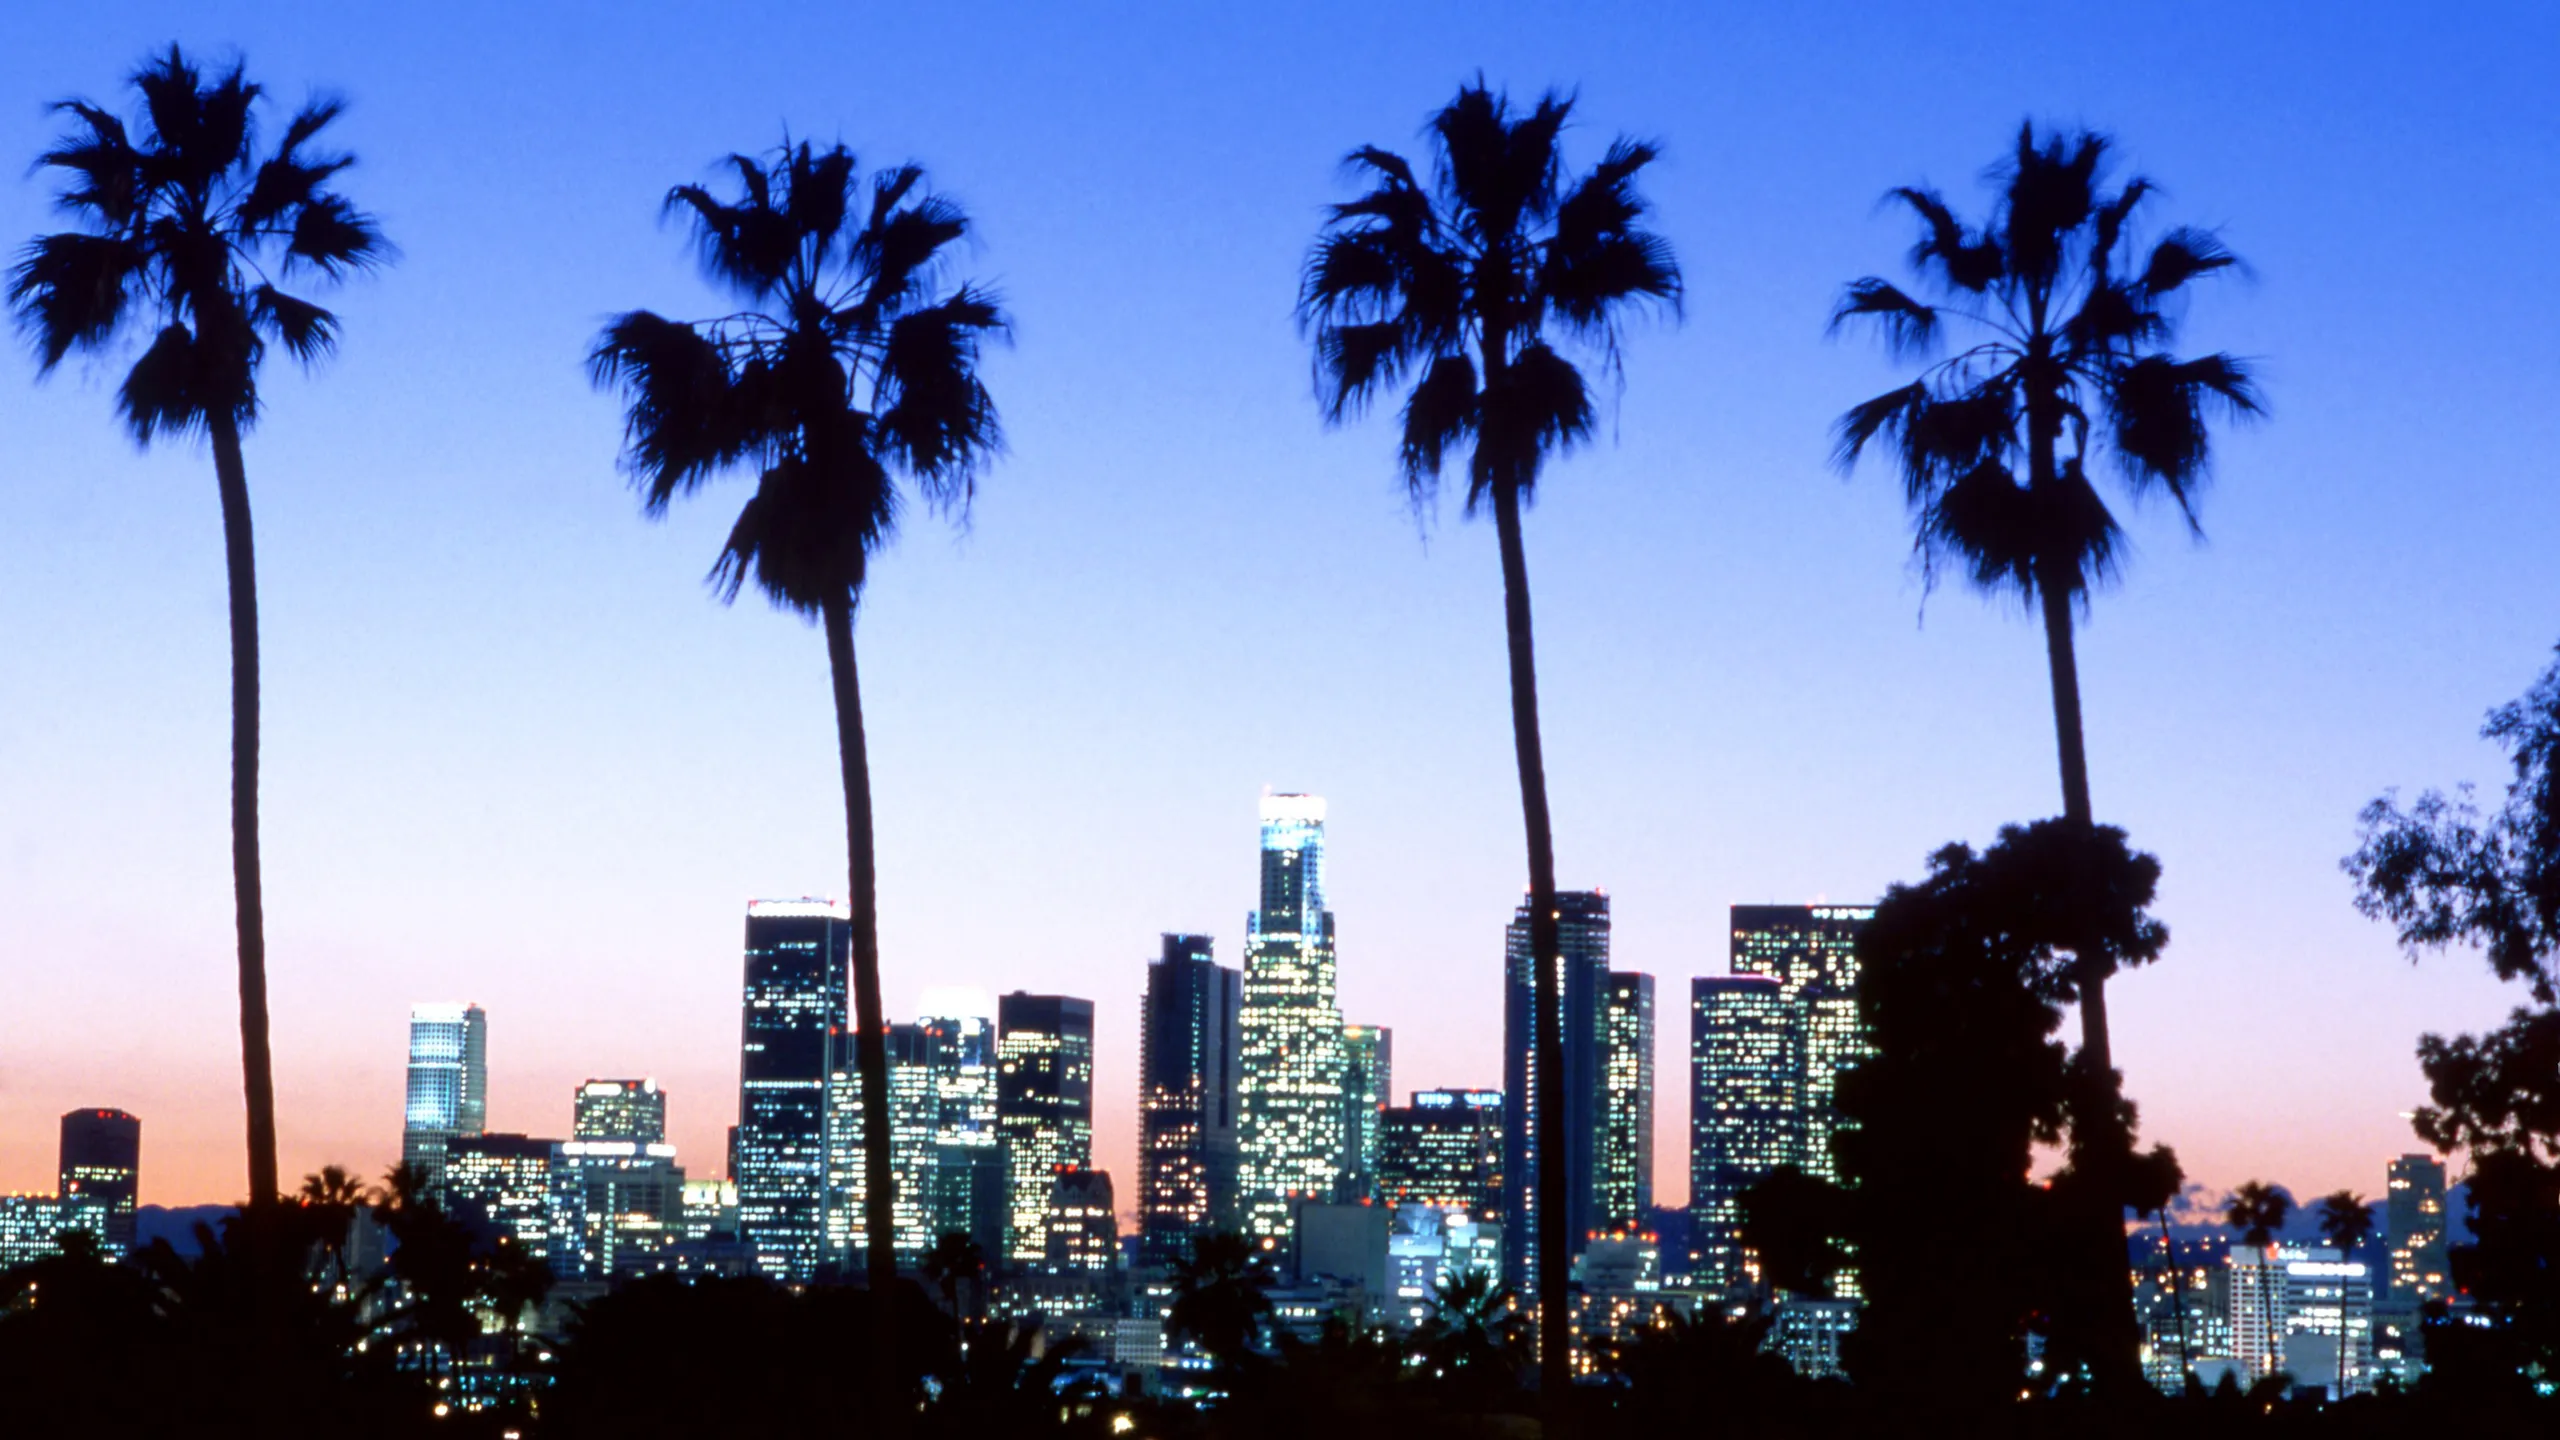



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from ast import parse
df=pd.read_csv('/content/crimes.csv',parse_dates=["Date Rptd","DATE OCC"],low_memory=False)

In [ ]:
df.head()

DR_NO   Date Rptd    DATE OCC  TIME OCC    AREA NAME  \
0  221412410  2022-06-15  2020-11-12      1700      Pacific   
1  220314085  2022-07-22  2020-05-12      1110    Southwest   
2  222013040  2022-08-06  2020-06-04      1620      Olympic   
3  220614831  2022-08-18  2020-08-17      1200    Hollywood   
4  231207725  2023-02-27  2020-01-27       635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  Invest Cont   
4            H         NaN  Invest Cont   

                                   LOCATION  
0  13600    MARINA POINT                 DR  
1   2500 S  SYCAMORE                     AV  
2   3300    SAN MARINO                   ST  
3                         1900    TRANSIENT  
4   6200    4TH                          AV

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         247988 non-null  int64         
 1   Date Rptd     247988 non-null  datetime64[ns]
 2   DATE OCC      247988 non-null  datetime64[ns]
 3   TIME OCC      247988 non-null  int64         
 4   AREA NAME     247988 non-null  object        
 5   Crm Cd Desc   247988 non-null  object        
 6   Vict Age      247988 non-null  int64         
 7   Vict Sex      215740 non-null  object        
 8   Vict Descent  215739 non-null  object        
 9   Weapon Desc   80087 non-null   object        
 10  Status Desc   247988 non-null  object        
 11  LOCATION      247988 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 22.7+ MB


#Q1


In [ ]:
time_occ=pd.to_numeric(df['TIME OCC'],errors='coerce').fillna(0).astype(int)

In [ ]:
time_occ

0         1700
1         1110
2         1620
3         1200
4          635
          ... 
247983    1100
247984    1800
247985    1000
247986    1630
247987     900
Name: TIME OCC, Length: 247988, dtype: int64

In [ ]:
hours=(time_occ // 100).clip(0,23)

In [ ]:
df['hours']=hours

In [ ]:
peak_crime_hour=int(df['hours'].value_counts().idxmax())

In [ ]:
peak_crime_hour

12

In [ ]:
df

DR_NO  Date Rptd   DATE OCC  TIME OCC    AREA NAME  \
0       221412410 2022-06-15 2020-11-12      1700      Pacific   
1       220314085 2022-07-22 2020-05-12      1110    Southwest   
2       222013040 2022-08-06 2020-06-04      1620      Olympic   
3       220614831 2022-08-18 2020-08-17      1200    Hollywood   
4       231207725 2023-02-27 2020-01-27       635  77th Street   
...           ...        ...        ...       ...          ...   
247983  231510379 2023-05-29 2023-05-25      1100  N Hollywood   
247984  231604807 2023-01-27 2023-01-26      1800     Foothill   
247985  231606525 2023-03-22 2023-03-22      1000     Foothill   
247986  231210064 2023-04-12 2023-04-12      1630  77th Street   
247987  230906458 2023-03-05 2023-03-05       900     Van Nuys   

                                              Crm Cd Desc  Vict Age Vict Sex  \
0         THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                       THEFT OF IDENTITY        27        F   
2                                       THEFT OF IDENTITY        60        M   
3                                       THEFT OF IDENTITY        28        M   
4                                       THEFT OF IDENTITY        37        M   
...                                                   ...       ...      ...   
247983                                 BUNCO, GRAND THEFT        25        M   
247984  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        23        M   
247985     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        25        F   
247986     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        29        M   
247987           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        53        F   

       Vict Descent                                     Weapon Desc  \
0               NaN                                             NaN   
1                 B                                             NaN   
2                 H                                             NaN   
3                 H                                             NaN   
4                 H                                             NaN   
...             ...                                             ...   
247983            W                                             NaN   
247984            H                                             NaN   
247985            H  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
247986            B                     UNKNOWN WEAPON/OTHER WEAPON   
247987            H                                             NaN   

        Status Desc                                  LOCATION  hours  
0       Invest Cont  13600    MARINA POINT                 DR     17  
1       Invest Cont   2500 S  SYCAMORE                     AV     11  
2       Invest Cont   3300    SAN MARINO                   ST     16  
3       Invest Cont                         1900    TRANSIENT     12  
4       Invest Cont   6200    4TH                          AV      6  
...             ...                                       ...    ...  
247983  Invest Cont   5300    DENNY                        AV     11  
247984  Invest Cont  12500    BRANFORD                     ST     18  
247985  Invest Cont  12800    FILMORE                      ST     10  
247986  Invest Cont   6100 S  VERMONT                      AV     16  
247987  Invest Cont  14500    HARTLAND                     ST      9  

[247988 rows x 13 columns]

#Q2


In [ ]:
night_mask=(df['hours']>=22)|(df['hours']<=3)

In [ ]:
night_mask

0         False
1         False
2         False
3         False
4         False
          ...  
247983    False
247984    False
247985    False
247986    False
247987    False
Name: hours, Length: 247988, dtype: bool

In [ ]:
night_df=df.loc[night_mask].copy()  #loc=location ده بياخد الTRUES

In [ ]:
from numpy._core.multiarray import empty
peak_night_crime_location=(
    night_df["AREA NAME"].value_counts().idxmax()
    if not night_df.empty else np.nan)


In [ ]:
peak_night_crime_location

'Central'

In [ ]:
counts=night_df["AREA NAME"].value_counts()
top_count=counts.max()

In [ ]:
top_count

4091

#Q3

In [ ]:
valid_age=pd.to_numeric(df['Vict Age'],errors='coerce') #errors='coerce' means any errors put it as null
valid_age=valid_age.where(valid_age>0)

In [ ]:
valid_age

0          NaN
1         27.0
2         60.0
3         28.0
4         37.0
          ... 
247983    25.0
247984    23.0
247985    25.0
247986    29.0
247987    53.0
Name: Vict Age, Length: 247988, dtype: float64

In [ ]:
age_bins=pd.cut(valid_age, bins=[0,17,25,34,44,54,64,200],           #cut بتصنفهم تصنيفات فى حالتنا اعمار
                labels=["0-17","18-25","26-34","35-44","45-54","55-64","65+"],
                right=True,include_lowest=True
                )

In [ ]:
age_bins

0           NaN
1         26-34
2         55-64
3         26-34
4         35-44
          ...  
247983    18-25
247984    18-25
247985    18-25
247986    26-34
247987    45-54
Name: Vict Age, Length: 247988, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']